 ### 决策树实战task：
1、基于tennis.csv数据，建立决策树模型，评估模型表现  
2、可视化决策树结构  
3、修改min_samples_leaf参数，对比模型结果  

In [1]:
# refer to https://www.cse.unsw.edu.au/~cs9417ml/DT1/decisiontreealgorithm.html#:~:text=4.-,ID3%20Basic,attribute%20at%20every%20tree%20node.


import numpy as np
import pandas as pd

In [2]:
# load data

data = pd.read_csv("tennis.csv")

# 将文字转换成数字
data['Outlook'] = data['Outlook'].map({"sunny": 0, "overcast": 1, "rain": 2})
data['Temperature'] = data['Temperature'].map({"cool": 0, "mild": 1, "hot": 2})
data['Humidity'] = data['Humidity'].map({"high": 10, "normal": 5})
data['Windy'] = data['Windy'].map({False: 0, True: 1})
data['Decision'] = data['Decision'].map({"n": 0, "p": 1})


data.head(20)


,Outlook,Temperature,Humidity,Windy,Decision
0,0,2,10,0,0
1,0,2,10,1,0
2,1,2,10,0,1
3,2,1,10,0,1
4,2,0,5,0,1
5,2,0,5,1,0
6,1,0,5,1,1
7,0,1,10,0,0
8,0,0,5,0,1
9,2,1,5,0,1


In [3]:
#define the X and y
X = data.drop(['Decision'],axis=1)
y = data.loc[:,'Decision']
print(X.shape,y.shape)

(14, 4) (14,)


In [4]:
#establish the decision tree model
from sklearn import tree
dc_tree = tree.DecisionTreeClassifier(criterion='entropy',min_samples_leaf=1)
dc_tree.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

In [5]:
#evaluate the model
y_predict = dc_tree.predict(X)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y,y_predict)
print(accuracy)

1.0


[Text(0.4, 0.9, 'Humidity <= 7.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]\nclass = positive'),
 Text(0.2, 0.7, 'Outlook <= 1.5\nentropy = 0.592\nsamples = 7\nvalue = [1, 6]\nclass = positive'),
 Text(0.1, 0.5, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = positive'),
 Text(0.3, 0.5, 'Windy <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]\nclass = positive'),
 Text(0.2, 0.3, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = positive'),
 Text(0.4, 0.3, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = negative'),
 Text(0.6, 0.7, 'Outlook <= 0.5\nentropy = 0.985\nsamples = 7\nvalue = [4, 3]\nclass = negative'),
 Text(0.5, 0.5, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = negative'),
 Text(0.7, 0.5, 'Outlook <= 1.5\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]\nclass = positive'),
 Text(0.6, 0.3, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = positive'),
 Text(0.8, 0.3, 'Windy <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = negative'),
 Text(

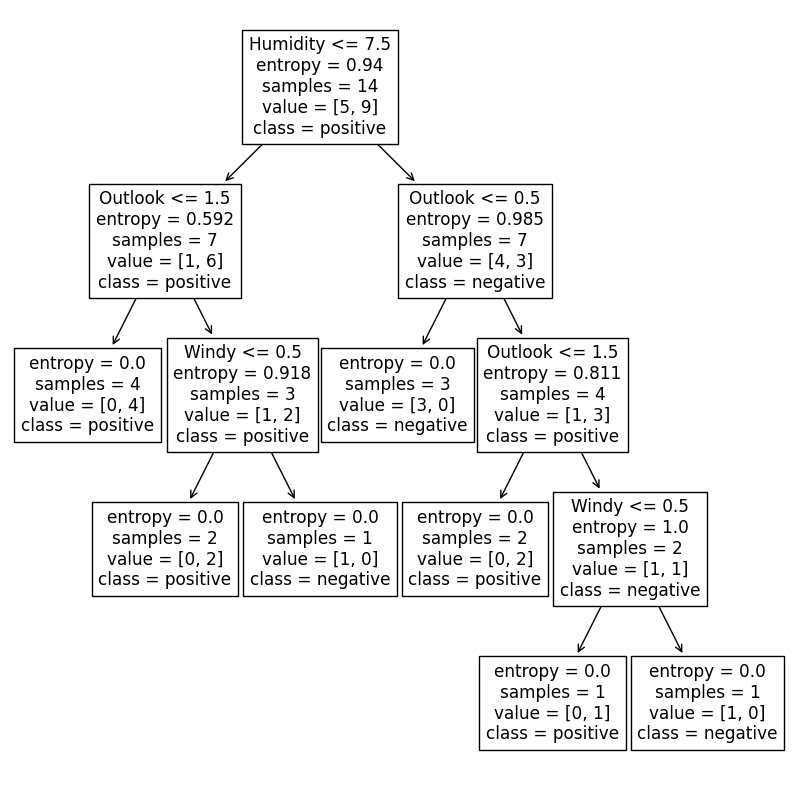

In [6]:
#visualize the tree
%matplotlib inline
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(10,10))
tree.plot_tree(dc_tree,
               feature_names=['Outlook','Temperature','Humidity','Windy'],class_names=['negative','positive'])

In [7]:
data = pd.read_csv("tennis.csv")
#define the X and y
X = data.drop(['Decision'],axis=1)
y = data.loc[:,'Decision']
print(X.shape,y.shape)

(14, 4) (14,)


In [8]:
import sys
# setting path
sys.path.append('../')

from decision_tree import MyID3DecisionTreeClassifier

In [9]:
id3_tree = MyID3DecisionTreeClassifier()
id3_tree.fit(X,y)

In [12]:
y_predict = id3_tree.predict(X)

d:\project\python\ai\ai_course\chapter4\lab_id3_tree\..\decision_tree.py:226: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  row_value = row[self.feature_names.get_loc(best_feature)]


In [13]:
#evaluate the model

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y,y_predict)
print(accuracy)

1.0
